In [ ]:
# Aubrey_Figueroa_BIOL-51000_Week4_Final.ipynb
import cv2
import numpy as np

# Comment the following line if not using Google Collab notebook.
from google.colab.patches import cv2_imshow

In [ ]:
# This class reads the RedGreenArray.png image using OpenCV (cv2).
# The image array has three dimensions: height, width, and color channels.
# This is a 3-channel image, converted from RGB to BGR by cv2.
# The methods include storing the red and green channels separately, calculating
# the number of pixels by multiplying the blue and green dimensions.
# It then generates a matrix of differences squared between the flattened channels
# and then applied the square root.
class ImageDifferencesCalculator:
 @staticmethod
 def compute_differences( image_path ):
  image = cv2.imread( image_path )
  red_channel = image[ :, :, 2 ].astype( np.float32 )
  green_channel = image[ :, :, 1 ].astype( np.float32 )

  num_pixels = red_channel.shape[ 0 ] * red_channel.shape[ 1 ]

  # Reshape to 1D arrays.
  red_channel_flat = red_channel.reshape( num_pixels, 1 )
  green_channel_flat = green_channel.reshape( num_pixels, 1 )

  diff_matrix = np.sqrt( np.square( green_channel_flat - red_channel_flat ).reshape( red_channel.shape ) )

  return diff_matrix

In [ ]:
class ImageProcessor:
 # Assign values to specific color channels in a new image (result_image) based
 # on the pixel-wise differences calculated in the difference_channel.
 def __init__( self, image_path ):
  self.image_path = image_path
  self.image = cv2.imread( image_path )

  # image[:, :, n]: extracts index n of the color channels which corresponds to
  # the red or green channel fluorescence intensity, in an BGR image.
  # The notation [:, :, n] means that we want to include all rows (:), all columns (:),
  # and the nth channel: (n).
  # The result is a 2D array representing the fluorescence intensity values of
  # the red or green channel for each pixel.
  self.red_channel = self.image[ :, :, 2 ].astype( np.float32 )
  self.green_channel = self.image[ :, :, 1 ].astype( np.float32 )

 def process_image( self ):
  difference_channel = self.green_channel - self.red_channel
  result_image = np.zeros_like( self.image )

  # This line assigns positive values in the difference_channel to the red channel
  # (2) of the result_image.
  # The condition difference_channel > 0 creates a mask for positive values, and
  # these positive values are assigned to the red channel.
  result_image[ difference_channel > 0, 2 ] =  difference_channel[ difference_channel > 0 ]
  # This line assigns negative values in the difference_channel (negated) to the
  # green channel (1) of the result_image.
  # The condition difference_channel < 0 creates a mask for negative values, and
  # the negated negative values are assigned to the green channel.
  result_image[ difference_channel < 0, 1 ] = -difference_channel[ difference_channel < 0 ]

  epsilon = 1e-10 # Small constant to avoid division by zero.
  # Combine --sum, the red and green channels with the logarithm (base 2) of the ratio.
  ratio_log = np.log2( (self.red_channel + epsilon) / (self.green_channel + epsilon) )
  # Scale the ratio_log values to fit into the range [0, 255].
  # The .astype( np.uint8 ) ensures that the transformed values can be properly
  # visualized or stored in an image format that uses the common 8-bit per channel representation.
  ratio_log_scaled = ((ratio_log - ratio_log.min( )) / (ratio_log.max( ) - ratio_log.min( )) * 255).astype( np.uint8 )
  # The values from the ratio_log_scaled array are assigned to the unused
  # blue channel of result_image.
  result_image[ :, :, 0 ] = ratio_log_scaled

  return result_image

In [ ]:
class ImageDisplayer:
 @staticmethod
 def display_image( image ):
  cv2_imshow( image )
  # Save the result image to a file (if needed)
  cv2.imwrite( "result_image.png", result_image )

Difference Matrix:
[[ 0., 0., 0.,..., 6., 8., 6.],
 [ 4., 2., 0.,..., 8., 8., 8.],
 [ 8., 4., 2.,...,10.,10., 8.],
 ...,
 [ 0., 0., 0.,..., 0., 0., 0.],
 [ 0., 1., 1.,..., 2., 2., 2.],
 [ 0., 1., 1.,..., 2., 2., 2.]]

Processed Difference Matrix (Replaced squared and square-rooted values):
[[0.,0.,0.,...,0.,0.,0.],
 [4.,2.,0.,...,0.,0.,0.],
 [0.,4.,2.,...,0.,0.,0.],
 ...,
 [0.,0.,0.,...,0.,0.,0.],
 [0.,1.,1.,...,2.,2.,2.],
 [0.,1.,1.,...,2.,2.,2.]]




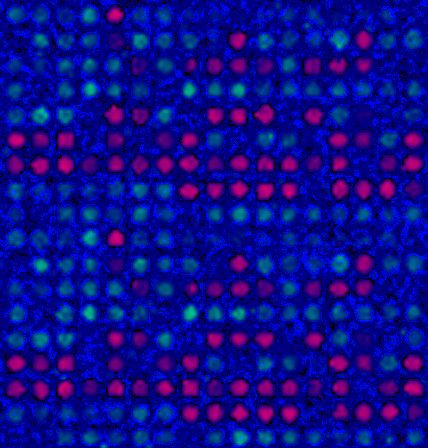

In [ ]:
# Usage
image_path = "RedGreenArray.png"

# Create instances of the classes.
calculator = ImageDifferencesCalculator( )
processor = ImageProcessor( image_path )
displayer = ImageDisplayer( )

diff_matrix = calculator.compute_differences(image_path)
print("Difference Matrix:")
print(np.array2string(diff_matrix, precision=2, separator=',', suppress_small=True))

# The threshold here (5) is arbitrary, and depends on the context of the assay.
diff_matrix_processed = np.where( diff_matrix > 5, 0, diff_matrix )

# Display the processed difference matrix.
print( "\nProcessed Difference Matrix (Replaced squared and square-rooted values):" )
print(np.array2string(diff_matrix_processed, precision=2, separator=',', suppress_small=True))
print("\n")

# # Uncomment to print each row of the matrix  --long output...
# print("Difference Matrix:")
# for row in diff_matrix:
#     print(row)

# Process, and display the image.
result_image = processor.process_image( )
displayer.display_image( result_image )

# eof